### Exploratory Data Analysis

In [58]:
import pandas as pd
import ast
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib.pyplot
import seaborn as sns

#### Research question: How popular is each genre over the last decade?

##### Evaluating popularity by number of movies made per genre

In [119]:
# Comparing genre popularity to previous decades 

# Read in TMDB movie data for 2015-2024
tmdb_data_2015_2024 = pd.read_csv(f'../data/movies_2015_2024.csv').drop_duplicates(subset=['Title','Year'])

# Read in TMDB movie data for 2015-2024
tmdb_data_2015_2024 = pd.read_csv(f'../data/movies_2015_2024.csv').drop_duplicates(subset=['Title','Year'])

# Read in TMDB movie data from 2005-2014
tmdb_data_2005_2014 = pd.read_csv(f'../data/movies_2005_2014.csv').drop_duplicates(subset=['Title','Year'])

# Read in TMDB movie data from 1995-2004
tmdb_data_1995_2004 = pd.read_csv(f'../data/movies_1995_2004.csv').drop_duplicates(subset=['Title','Year'])

# Convert Genre column to list type so that it can be exploded
tmdb_data_2015_2024['Genre'] = tmdb_data_2015_2024['Genre'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)
tmdb_data_2005_2014['Genre'] = tmdb_data_2005_2014['Genre'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)
tmdb_data_1995_2004['Genre'] = tmdb_data_1995_2004['Genre'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)

# Explode the movies_df DataFrame by genre
tmdb_data_2015_2024_exploded = tmdb_data_2015_2024.explode('Genre')
tmdb_data_2005_2014_exploded = tmdb_data_2005_2014.explode('Genre')
tmdb_data_1995_2004_exploded = tmdb_data_1995_2004.explode('Genre')

In [178]:
# Aggregating data to create a FacetGrid
recent_top_genres = tmdb_data_2015_2024_exploded.groupby('Genre').agg({'Title': 'count'}).sort_values('Title')[9:].index

tmdb_data_1995_2004 = tmdb_data_1995_2004_exploded[tmdb_data_1995_2004_exploded['Genre'].isin(recent_top_genres)].groupby('Genre').agg({'Title': 'count'}).sort_values('Title')
tmdb_data_1995_2004['Decade']='1995-2004'
tmdb_data_2005_2014 = tmdb_data_2005_2014_exploded[tmdb_data_2005_2014_exploded['Genre'].isin(recent_top_genres)].groupby('Genre').agg({'Title': 'count'}).sort_values('Title')
tmdb_data_2005_2014['Decade']='2005-2014'
tmdb_data_2015_2024 = tmdb_data_2015_2024_exploded[tmdb_data_2015_2024_exploded['Genre'].isin(recent_top_genres)].groupby('Genre').agg({'Title': 'count'}).sort_values('Title')
tmdb_data_2015_2024['Decade']='2015-2024'

movies_df = pd.concat([tmdb_data_1995_2004, tmdb_data_2005_2014, tmdb_data_2015_2024])

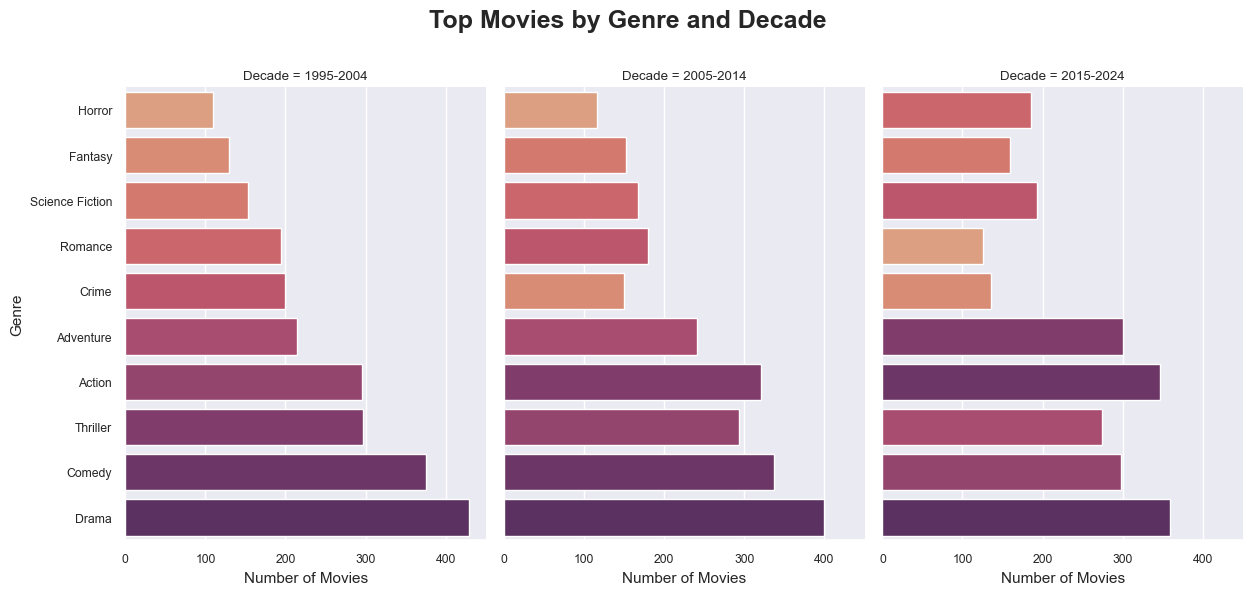

In [208]:
genre_plot = sns.FacetGrid(movies_df, col='Decade', height=6, aspect=0.7)
# Map the aggregated data using map_dataframe
genre_plot.map_dataframe(sns.barplot, 'Title', 'Genre', hue='Genre', legend=False, palette='flare')
genre_plot.set_axis_labels('Number of Movies','Genre', fontsize=11)
genre_plot.fig.subplots_adjust(top=.85)
genre_plot.fig.suptitle('Top Movies by Genre and Decade', fontweight='bold', fontsize=18)
sns.set(font_scale=.8)  
plt.show()

Thriller, Comedy, Adventure, Action, and Drama are consistently the top genres over the past 3 decades, where movie popularity is represented by TMDB vote count.  

Action movies are on the rise, taking fourth place from 1995-2004, then third place from 2005-2014, then claiming the #2 spot from 2015-2024.